# Visualizing Data with Seaborn

## Penguins Data
---

### Setting a default style theme

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default style for visualizations
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False
}

sns.set_theme(style = 'ticks', palette = 'Set2', font = 'Arial', rc = custom_params)

### Importing the data

In [2]:
# Load the Penguins example dataset into a dataframe
df_raw = sns.load_dataset('penguins')

# Make a new copy of df_raw (called df) for cleaning/transformation
df = df_raw.copy()

# Get a birds-eye view of the data
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# Get summary info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Inspecting the data

In [4]:
# Check for duplicate rows
total_duplicates = df.duplicated().sum()
print(f"There are {total_duplicates} duplicated rows in this dataset.")

There are 0 duplicated rows in this dataset.


In [5]:
# Check for null (i.e. NaN) values
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
# Get the rows that have NaN values
df[df.isna().any(axis = 1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


### Cleaning the data
Since we won't be grouping by sex in our visualizations, we will keep the rows that only have NaNs for sex (9 rows total).  

However, since two rows (i.e. row index 3 & row index 339) have NaNs for all values except species and island, we will drop those two rows from our dataset.

In [7]:
# Drop row index 3 and row index 339
df = df.drop(df.index[[3, 339]])

In [8]:
# Check that the only column with NaNs is sex
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

---

### 1. Create a scatter plot that includes the following parameters:
* bill_length_mm on the x-axis
* bill_depth_mm on the y-axis
* use hue to indicate species

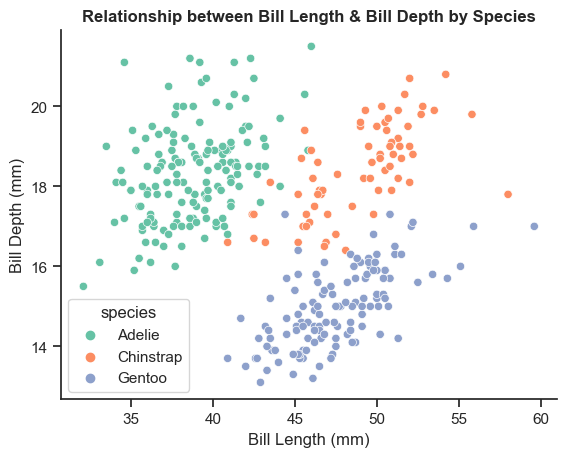

In [9]:
sns.scatterplot(df, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')

plt.title('Relationship between Bill Length & Bill Depth by Species', fontweight = 'bold')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

plt.show()

---

### 2. Create a kde plot that includes the following parameters:
* display the distribution of body_mass_g 
* use hue to indicate 'island'

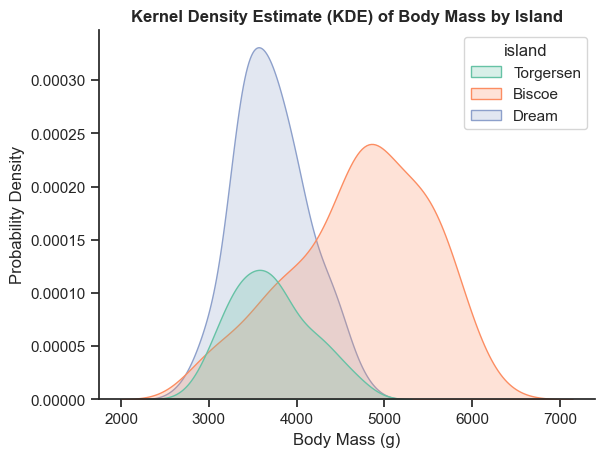

In [10]:
sns.kdeplot(df, x = 'body_mass_g', hue = 'island', fill = True)

plt.title('Kernel Density Estimate (KDE) of Body Mass by Island', fontweight = 'bold')
plt.xlabel('Body Mass (g)')
plt.ylabel('Probability Density')

plt.show()

---

### 3. Create a correlation matrix for the dataframe.  Use a heatmap to show the strength of the correlations.

In [12]:
# Compute a correlation matrix and assign to corr_matrix
corr_matrix = df.corr('pearson', numeric_only = True)
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


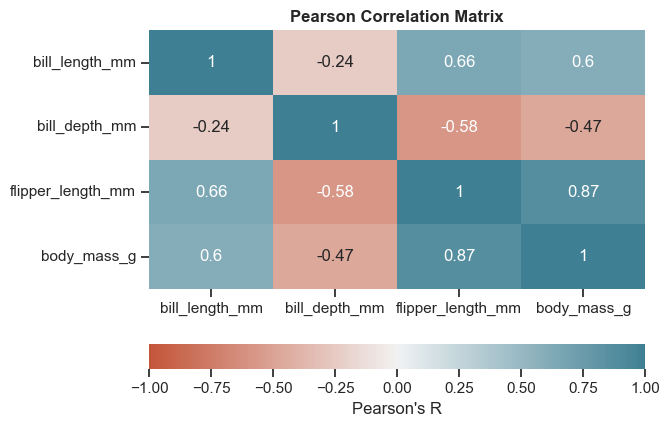

In [33]:
# Plot a heatmap from corr_matrix
custom_cmap = sns.diverging_palette(20, 220, as_cmap = True)

sns.heatmap(corr_matrix, vmin = -1.0, vmax = 1.0, annot = True, cmap = custom_cmap,
            cbar_kws = {
                'label': 'Pearson\'s R',
                'orientation': 'horizontal'
            })

plt.title('Pearson Correlation Matrix', fontweight = 'bold')
plt.show()

---

### 4. Create a pairplot for the DataFrame.
* What (if any) variables/columns are positively correlated? 
    * Flipper Length (mm) & Bill Length (mm)
    * Body Mass (g) & Bill Length (mm)
    * Body Mass (g) & Flipper Length (mm)
* What (if any) variables/columns are negatively correlated? 
    * Flipper Length (mm) & Bill Depth (mm)
    * Body Mass (g) & Bill Depth (mm)
* What (if any) variables/columns are not correlated at all?
    * Bill Depth (mm) & Bill Length (mm)

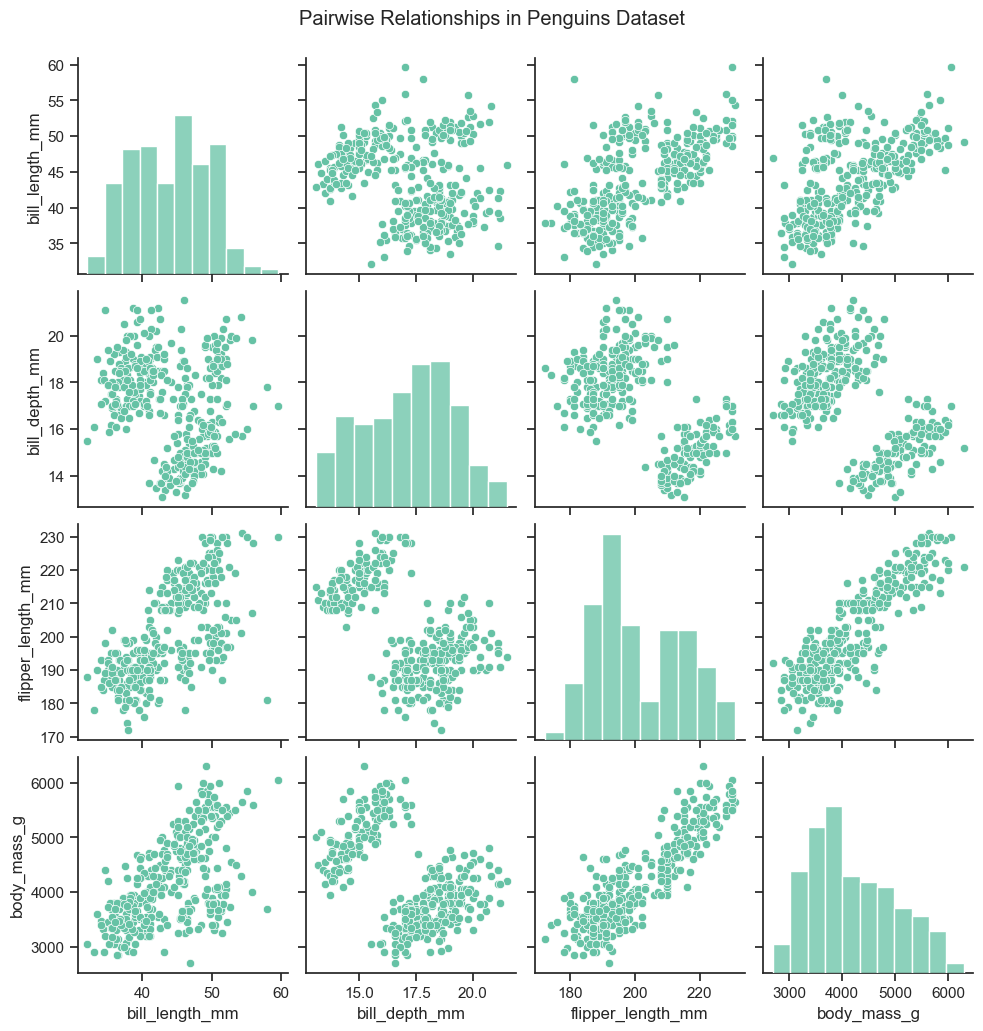

In [54]:
sns.pairplot(df).fig.suptitle('Pairwise Relationships in Penguins Dataset', y = 1.03)

plt.show()

In [37]:
# We can confirm our pairplot correlation observations with the correlation matrix
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


---

### 5. Create a swarm plot with the following features:
* 'island' on the x-axis.
* 'flipper length' on the y-axis.
* hue to indicate 'species'.

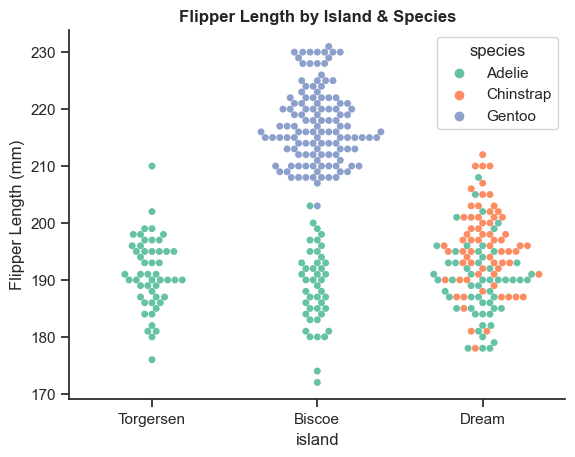

In [43]:
sns.swarmplot(df, x = 'island', y = 'flipper_length_mm', hue = 'species')

plt.title('Flipper Length by Island & Species', fontweight = 'bold')
plt.ylabel('Flipper Length (mm)')

plt.show()

---